# Merge tables using Pandas
----

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Next** we will load our data as a Pandas DataFrames. In this case, we will be using data from multiple files.   

First, we will load some data on the Rand exchange rates over time.

In [2]:
exchange_rates_df = pd.read_csv('Exchange_Rates_clean.csv', index_col=0)
exchange_rates_df.head(10)

,"ZAR/SDR, End of Period","ZAR/SDR, Period Average","ZAR/USD, End of Period","ZAR/USD, Period Average","Nominal Effective Exchange Rate, Trade Partners by Consumer Price Index","Real Effective Exchange Rate, based on Consumer Price Index"
2008M01,11.85,11.11,7.43,7.01,99.77,89.48
2008M02,12.44,12.15,7.73,7.66,90.93,81.68
2008M03,13.32,13.01,8.10,7.97,84.94,76.68
2008M04,12.33,12.74,7.60,7.79,86.50,78.43
2008M05,12.33,12.37,7.61,7.62,89.12,81.04
2008M06,12.77,12.82,7.82,7.92,85.94,78.76
2008M07,11.88,12.44,7.33,7.63,88.42,81.40
2008M08,12.10,12.14,7.71,7.66,90.70,84.16
2008M09,12.88,12.53,8.27,8.06,89.27,83.30
2008M10,15.05,14.76,10.11,9.74,78.01,73.19


Cool, so we have monthly data on the Rand exchange rates!   
   
We won't be needing all of the columns, so let's drop a few of them to keep things simple.

In [3]:
exchange_rates_df = exchange_rates_df.drop(['ZAR/SDR, End of Period', 
                                            'ZAR/USD, End of Period',
                                            'Nominal Effective Exchange Rate, Trade Partners by Consumer Price Index',
                                            'Real Effective Exchange Rate, based on Consumer Price Index'], axis=1)
exchange_rates_df.head(10)

,"ZAR/SDR, Period Average","ZAR/USD, Period Average"
2008M01,11.11,7.01
2008M02,12.15,7.66
2008M03,13.01,7.97
2008M04,12.74,7.79
2008M05,12.37,7.62
2008M06,12.82,7.92
2008M07,12.44,7.63
2008M08,12.14,7.66
2008M09,12.53,8.06
2008M10,14.76,9.74


**Let's plot** the ZAR/USD exchange rate over time

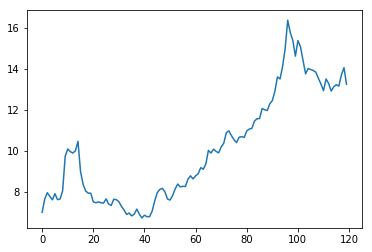

In [4]:
y = exchange_rates_df[['ZAR/USD, Period Average']].values
x = np.arange(len(y))

plt.plot(x, y)
plt.show()

Above we can see the ZAR/USD exchange rate over a period of 48 months, starting in 2014.   

## Trade Data   
**Next**, let's load some data for some other economic indicators.

In [5]:
# Load trade dataset
trade_df = pd.read_csv('Trade_clean.csv', index_col=0)
trade_df.head()

,Value of Exports (USD),Value of Exports (ZAR),"Value of Imports, CIF (USD)","Value of Imports, CIF (ZAR)","Value of Imports, FOB (ZAR)","Value of Imports, FOB (USD)"
2008M01,5611.90,39356.82,8105.11,56841.94,49573.22,7068.66
2008M02,6126.16,46946.33,8159.43,62527.78,52766.09,6885.60
2008M03,6417.48,51150.89,8010.87,63851.12,56181.04,7048.57
2008M04,7215.71,56174.34,9112.97,70944.49,66169.00,8499.55
2008M05,7379.67,56240.45,9090.14,69275.97,57900.04,7597.43


## Liquidity

In [6]:
# Load liquidity dataset
liquidity_df = pd.read_csv('Liquidity_clean.csv', index_col=0)
liquidity_df.head()

,Total Reserves excluding Gold (USD),"Official Reserve Assets, SDRs (USD)","Official Reserve Assets, IMF Reserve Position (USD)","Total Reserves excluding Gold, Foreign Exchange (USD)",Gold Holdings (USD),"Claims on Non-residents, International Liquidity (USD)","Liabilities To Non-residents, International Liquidity (USD)","Claims on Non-residents, Other Survey (USD)","Liabilities to Non-residents, Other Survey (USD)"
2008M01,29884.51,355.81,1.92,29526.78,3690.37,10.76,2409.16,51547.61,37752.29
2008M02,30304.31,359.26,2.01,29943.04,3865.99,10.19,2173.78,59702.31,45927.67
2008M03,30615.42,366.83,2.05,30246.54,3744.98,9.04,1808.06,56448.18,42565.17
2008M04,30763.42,362.18,2.03,30399.21,3483.85,9.53,2197.45,55534.75,43342.70
2008M05,30831.43,361.52,2.10,30467.81,3540.06,9.55,2139.84,57682.89,46533.13


## Interest Rates

In [7]:
# Load interest rates dataset
interest_rates_df = pd.read_csv('Interest_Rates_clean.csv', index_col=0)
interest_rates_df.head()

,Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds
2008M01,11.0,10.64,10.47,4.53,10.83,14.5,8.36
2008M02,11.0,10.66,10.32,5.61,11.00,14.5,8.69
2008M03,11.0,10.69,10.18,5.62,11.04,14.5,9.16
2008M04,11.5,11.00,10.27,5.80,11.28,15.0,9.15
2008M05,11.5,11.20,10.60,6.50,11.39,15.0,9.51


## CPI

In [8]:
# Load CPI dataset
CPI_df = pd.read_csv('CPI_PPI_clean.csv', index_col=0)
CPI_df.head()

,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,312.97,86.03,85.48
2008M02,335.09,87.23,85.91
2008M03,348.84,89.00,87.04
2008M04,358.47,90.83,87.61
2008M05,371.98,95.32,88.32


## Merge DataFrames
**Finally**, let's merge all of these datasets together to make one.

In [9]:
# Merge exchange_rates and trade
df = pd.merge(left=exchange_rates_df, right=trade_df, how='inner', left_index=True, right_index=True)
df = pd.merge(left=df, right=liquidity_df, how='inner', left_index=True, right_index=True)
df = pd.merge(left=df, right=interest_rates_df, how='inner', left_index=True, right_index=True)
df = pd.merge(left=df, right=CPI_df, how='inner', left_index=True, right_index=True)
df.head(10)

,"ZAR/SDR, Period Average","ZAR/USD, Period Average",Value of Exports (USD),Value of Exports (ZAR),"Value of Imports, CIF (USD)","Value of Imports, CIF (ZAR)","Value of Imports, FOB (ZAR)","Value of Imports, FOB (USD)",Total Reserves excluding Gold (USD),"Official Reserve Assets, SDRs (USD)",...,Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,11.11,7.01,5611.90,39356.82,8105.11,56841.94,49573.22,7068.66,29884.51,355.81,...,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,12.15,7.66,6126.16,46946.33,8159.43,62527.78,52766.09,6885.60,30304.31,359.26,...,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,13.01,7.97,6417.48,51150.89,8010.87,63851.12,56181.04,7048.57,30615.42,366.83,...,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,12.74,7.79,7215.71,56174.34,9112.97,70944.49,66169.00,8499.55,30763.42,362.18,...,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,12.37,7.62,7379.67,56240.45,9090.14,69275.97,57900.04,7597.43,30831.43,361.52,...,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32
2008M06,12.82,7.92,7595.95,60159.93,8379.54,66365.94,60343.84,7619.17,31102.67,364.41,...,12.0,11.49,11.42,7.13,11.74,15.5,10.35,356.82,97.82,89.60
2008M07,12.44,7.63,8034.45,61268.16,10589.92,80755.37,75599.59,9913.82,31299.82,361.57,...,12.0,11.70,11.38,7.22,12.01,15.5,10.10,317.62,100.43,90.88
2008M08,12.14,7.66,7882.49,60390.94,8995.88,68921.01,65514.39,8551.23,30966.32,350.22,...,12.0,11.69,11.35,7.24,11.93,15.5,9.20,308.21,100.95,91.44
2008M09,12.53,8.06,7579.28,61067.34,8928.30,71936.53,68179.24,8461.97,30832.17,347.40,...,12.0,11.71,11.15,7.06,12.08,15.5,9.04,288.18,97.40,92.01
2008M10,14.76,9.74,6737.19,65652.57,8141.32,79335.56,71810.53,7369.11,29934.99,332.02,...,12.0,11.77,10.93,7.31,12.25,15.5,9.24,233.78,96.93,92.30


## Let's try to predict the Rand exchange rate   

Now that we have all of our data in one neat DataFrame, let's see what we can do with machine learning.   
   
Rather than select a predictor variable using guesswork, let's make use of the Seaborn library to plot all of our variables.

In [10]:
df = df.drop(['Gold Holdings (USD)'], axis=1)
df.head()

,"ZAR/SDR, Period Average","ZAR/USD, Period Average",Value of Exports (USD),Value of Exports (ZAR),"Value of Imports, CIF (USD)","Value of Imports, CIF (ZAR)","Value of Imports, FOB (ZAR)","Value of Imports, FOB (USD)",Total Reserves excluding Gold (USD),"Official Reserve Assets, SDRs (USD)",...,Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,11.11,7.01,5611.90,39356.82,8105.11,56841.94,49573.22,7068.66,29884.51,355.81,...,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,12.15,7.66,6126.16,46946.33,8159.43,62527.78,52766.09,6885.60,30304.31,359.26,...,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,13.01,7.97,6417.48,51150.89,8010.87,63851.12,56181.04,7048.57,30615.42,366.83,...,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,12.74,7.79,7215.71,56174.34,9112.97,70944.49,66169.00,8499.55,30763.42,362.18,...,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,12.37,7.62,7379.67,56240.45,9090.14,69275.97,57900.04,7597.43,30831.43,361.52,...,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


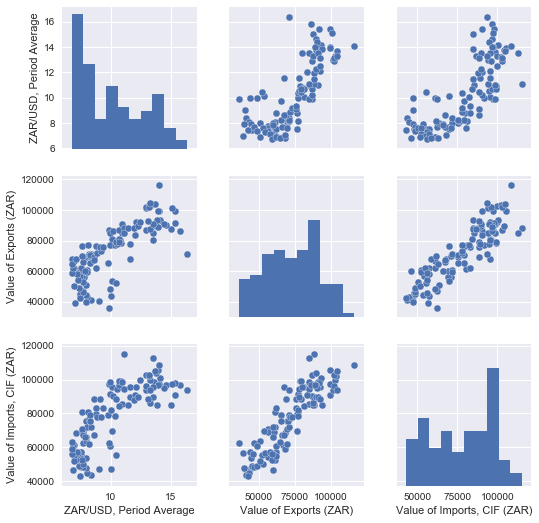

In [11]:
import seaborn as sns

sns.pairplot(df[['ZAR/USD, Period Average',
                'Value of Exports (ZAR)',
                'Value of Imports, CIF (ZAR)']])
plt.show()

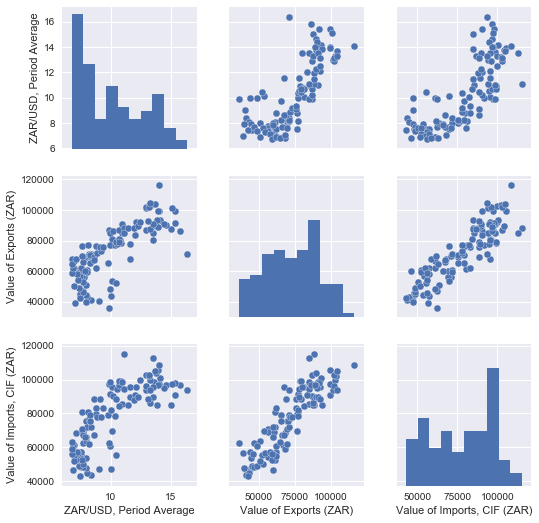

In [12]:
sns.pairplot(df[['ZAR/USD, Period Average',
                'Value of Exports (ZAR)',
                'Value of Imports, CIF (ZAR)']])
plt.show()

In [13]:
df.corr()

,"ZAR/SDR, Period Average","ZAR/USD, Period Average",Value of Exports (USD),Value of Exports (ZAR),"Value of Imports, CIF (USD)","Value of Imports, CIF (ZAR)","Value of Imports, FOB (ZAR)","Value of Imports, FOB (USD)",Total Reserves excluding Gold (USD),"Official Reserve Assets, SDRs (USD)",...,Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
"ZAR/SDR, Period Average",1.000000,0.992498,-0.335288,0.779669,-0.309695,0.811260,0.789061,-0.286161,0.307785,-0.027616,...,-0.041975,-0.018610,0.043663,0.059020,-0.023257,-0.041975,0.195524,0.177450,0.852235,0.851801
"ZAR/USD, Period Average",0.992498,1.000000,-0.335780,0.784756,-0.350606,0.791994,0.773617,-0.318303,0.308049,-0.013695,...,-0.056806,-0.030787,0.034169,0.041555,-0.034278,-0.056806,0.191455,0.139858,0.863282,0.872660
Value of Exports (USD),-0.335288,-0.335780,1.000000,0.298409,0.735534,0.112544,0.176066,0.800965,0.583256,0.532142,...,-0.499981,-0.516783,-0.513034,-0.507888,-0.519409,-0.499981,-0.241177,-0.056806,0.086921,0.043945
Value of Exports (ZAR),0.779669,0.784756,0.298409,1.000000,0.130149,0.887292,0.904445,0.194514,0.674501,0.309561,...,-0.368687,-0.351009,-0.281080,-0.258919,-0.353812,-0.368687,0.028151,0.126683,0.936481,0.918739
"Value of Imports, CIF (USD)",-0.309695,-0.350606,0.735534,0.130149,1.000000,0.278542,0.301466,0.981071,0.408418,0.302925,...,-0.267341,-0.301110,-0.310114,-0.300033,-0.302363,-0.267341,-0.357321,0.238790,0.002155,-0.098713
"Value of Imports, CIF (ZAR)",0.811260,0.791994,0.112544,0.887292,0.278542,1.000000,0.993818,0.296343,0.575439,0.190356,...,-0.247282,-0.240280,-0.180701,-0.155815,-0.243655,-0.247282,-0.064803,0.277996,0.887768,0.836289
"Value of Imports, FOB (ZAR)",0.789061,0.773617,0.176066,0.904445,0.301466,0.993818,1.000000,0.339075,0.636367,0.260309,...,-0.315390,-0.308031,-0.249060,-0.222691,-0.311763,-0.315390,-0.089357,0.224291,0.901424,0.851322
"Value of Imports, FOB (USD)",-0.286161,-0.318303,0.800965,0.194514,0.981071,0.296343,0.339075,1.000000,0.513862,0.411966,...,-0.377668,-0.407872,-0.415354,-0.401081,-0.410250,-0.377668,-0.381703,0.137541,0.067730,-0.025944
Total Reserves excluding Gold (USD),0.307785,0.308049,0.583256,0.674501,0.408418,0.575439,0.636367,0.513862,1.000000,0.811991,...,-0.864065,-0.864202,-0.825471,-0.783872,-0.862595,-0.864065,-0.377172,-0.320050,0.692428,0.663697
"Official Reserve Assets, SDRs (USD)",-0.027616,-0.013695,0.532142,0.309561,0.302925,0.190356,0.260309,0.411966,0.811991,1.000000,...,-0.912868,-0.921741,-0.893952,-0.897697,-0.919070,-0.912868,-0.378607,-0.545990,0.333161,0.342514


In [14]:
df.to_csv('data_2.csv')

In [15]:
df2 = df[['ZAR/USD, Period Average', 'Value of Exports (ZAR)']]

In [16]:
df2.head()

,"ZAR/USD, Period Average",Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [17]:
df2.to_csv('data_1.csv')